In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None) 

DataTransformerRegistry.enable('default')

### Data loading

In [3]:
temperatures = pd.read_csv('GLB.Ts+dSST.csv')
temperatures.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
0,1880,-0.29,-0.18,-0.11,-0.19,-0.11,-0.23,-0.21,-0.09,-0.16,-0.23,-0.20,-0.23,-0.19,***,***,-0.14,-0.18,-0.20
1,1881,-0.15,-0.17,0.04,0.04,0.02,-0.20,-0.06,-0.02,-0.13,-0.20,-0.21,-0.10,-0.10,-.11,-.18,0.03,-0.09,-0.18
2,1882,0.15,0.15,0.04,-0.18,-0.16,-0.26,-0.20,-0.05,-0.10,-0.24,-0.16,-0.24,-0.10,-.09,.06,-0.10,-0.17,-0.17
3,1883,-0.31,-0.39,-0.13,-0.17,-0.20,-0.12,-0.08,-0.15,-0.20,-0.14,-0.22,-0.16,-0.19,-.20,-.31,-0.16,-0.12,-0.19
4,1884,-0.15,-0.08,-0.37,-0.42,-0.36,-0.40,-0.34,-0.26,-0.27,-0.24,-0.30,-0.28,-0.29,-.28,-.13,-0.39,-0.34,-0.27


# New York Times

### Data transforming

In [4]:
temperatures['Year_average'] = 0.225 + np.round(
    np.mean(
        temperatures[['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov','Dec']], axis=1
    ), 3
)

### Rendered chart

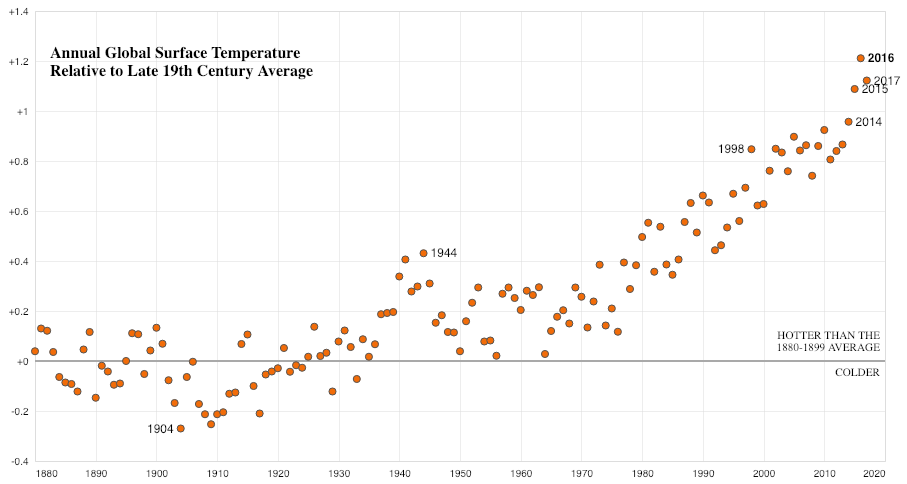

In [5]:
scatter = alt.Chart(
            temperatures,
            width=850, 
            height=450
        ).mark_circle(
            stroke = '#545454', 
            strokeWidth=1, 
            fill='#F26C08',
            size=4*4*math.pi,
            text='Year',
            opacity=1
        ).encode(
            x=alt.X('Year', 
                title='',
                scale=alt.Scale(domain=(min(temperatures['Year']), max(temperatures['Year']))),
                axis=alt.Axis(format='0r', tickCount=15)
            ), 
            y=alt.Y('Year_average:Q', 
                title='',
                scale=alt.Scale(domain=(-0.4,1.3)),
                axis=alt.Axis(format='+0', tickCount=9)
            )
        )

text_year1 = scatter.mark_text(align='right',baseline='middle',fontSize=12,dx=-7).encode(text=alt.condition('datum.Year==1904 || datum.Year==1998', 'Year', alt.value('')))
text_year2 = scatter.mark_text(align='left',baseline='middle',fontSize=12,dx=7).encode(text=alt.condition('datum.Year==1944 || datum.Year==2014 || datum.Year==2015 || datum.Year==2017', 'Year', alt.value('')))
text_year3 = scatter.mark_text(align='left',baseline='middle',fontWeight='bold',fontSize=12,dx=7).encode(text=alt.condition('datum.Year==2016', 'Year', alt.value('')))
years = text_year1 + text_year2 + text_year3

line = alt.Chart(pd.DataFrame([[1880,0],[2020,0]], columns=['x','y'])).mark_line(color='darkgrey').encode(x='x', y='y')

text_line1 = line.mark_text(align='right',text='HOTTER THAN THE', font='nyt-franklin', fontSize=11.2, fontWeight=300, clip=True,dx=-5, dy=-22)
text_line2 = line.mark_text(align='right',text='1880-1899 AVERAGE', font='nyt-franklin', fontSize=11.2, fontWeight=300, clip=True,dx=-5, dy=-10)
text_line3 = line.mark_text(align='right',text='COLDER', font='nyt-franklin', fontSize=11.2, fontWeight=300, clip=True,dx=-5, dy=15)
text_line4 = line.mark_text(align='left', text='Annual Global Surface Temperature', fontSize=16, font='nyt-franklin', fontWeight=800, clip=True,dx=-835,dy=-303)
text_line5 = line.mark_text(align='left', text='Relative to Late 19th Century Average', fontSize=16, font='nyt-franklin', fontWeight=800, clip=True,dx=-835,dy=-285)
hotter_colder = text_line1 + text_line2 + text_line3 + text_line4 + text_line5

(line + hotter_colder + scatter + years).configure_axis(
            gridOpacity=0.5,
            domain=False,
            tickColor='transparent'
        )

### Original image

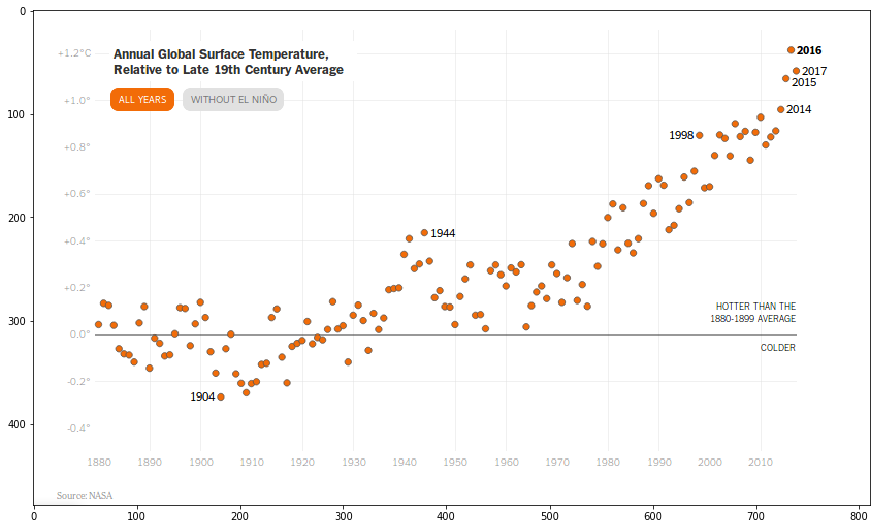

In [6]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('nyt.png'))

# Washington Post

### Data transforming

In [7]:
temperatures_stack = []

for _, year in temperatures.iterrows():
    temperatures_stack = np.append(temperatures_stack, [
        year[0], 'JAN.', year[1],
        year[0], 'FEB.', year[2],
        year[0], 'MAR.', year[3],
        year[0], 'APR.', year[4],
        year[0], 'MAY', year[5],
        year[0], 'JUNE', year[6],
        year[0], 'JULY', year[7],
        year[0], 'AUG.', year[8],
        year[0], 'SEP.', year[9],
        year[0], 'OCT.', year[10],
        year[0], 'NOV.', year[11],
        year[0], 'DEC.', year[12]
    ]).reshape(-1, 3)

temperatures_stack_df = pd.DataFrame(temperatures_stack, columns=['Year','Month', 'Diff'])

temperatures_stack_df.head()

,Year,Month,Diff
0,1880,JAN.,-0.29
1,1880,FEB.,-0.18
2,1880,MAR.,-0.11
3,1880,APR.,-0.19
4,1880,MAY,-0.11


### Rendered chart

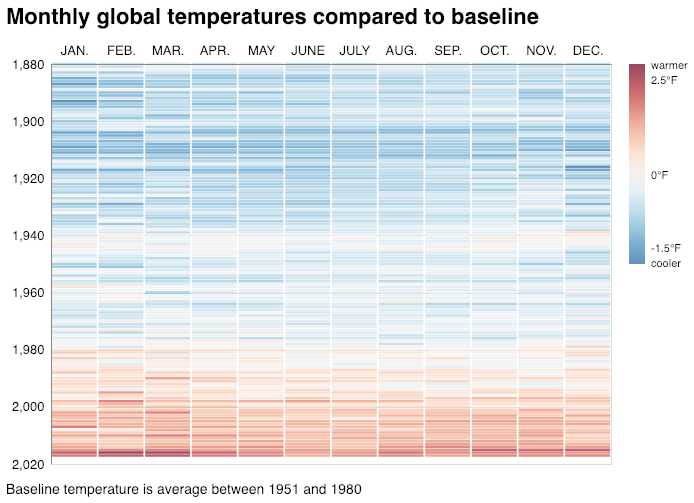

In [8]:
base = alt.Chart(
        temperatures_stack_df,
        width=560, 
        height=400
    ).mark_tick(orient='horizontal', thickness=2.5).encode(
        x=alt.X('Month:O', 
            axis=alt.Axis(labelAngle=0, orient='top'), 
            title='',
            sort=['JAN.', 'FEB.', 'MAR.', 'APR.', 'MAY', 'JUNE', 'JULY', 'AUG.', 'SEP.', 'OCT.', 'NOV.','DEC.']
        ),
        y=alt.Y('Year:Q', 
            axis=alt.Axis(tickCount=8), 
            title='', 
            scale=alt.Scale(domain=(2016, 1880))
        ),
        color=alt.Color('Diff:Q', 
            scale=alt.Scale(scheme=alt.SchemeParams(name='redblue', extent=[0.9, 0])),
            legend=alt.Legend(title='', values=[])
        )
    )

df_point = pd.DataFrame([[0,0]])
text1 = alt.Chart(df_point).mark_text(text='warmer', align='left', dx=320, dy=-195)
text2 = alt.Chart(df_point).mark_text(text='2.5°F', align='left', dx=320, dy=-180)
text3 = alt.Chart(df_point).mark_text(text='0°F', align='left', dx=320, dy=-85)
text4 = alt.Chart(df_point).mark_text(text='-1.5°F', align='left', dx=320, dy=-12)
text5 = alt.Chart(df_point).mark_text(text='cooler', align='left', dx=320, dy=3)
text6 = alt.Chart(df_point).mark_text(text='Baseline temperature is average between 1951 and 1980', align='left', fontSize=14, dx=-325, dy=230)
text7 = alt.Chart(df_point).mark_text(text='Monthly global temperatures compared to baseline', align='left', fontSize=22, fontWeight='bold', dx=-325, dy=-240)
text = text1 + text2 + text3 + text4 + text5 + text6 + text7

(base + text).configure_tick(
    bandSize=45
).configure_axis(
    tickColor='transparent',
    labelFontSize=13
)

### Original image

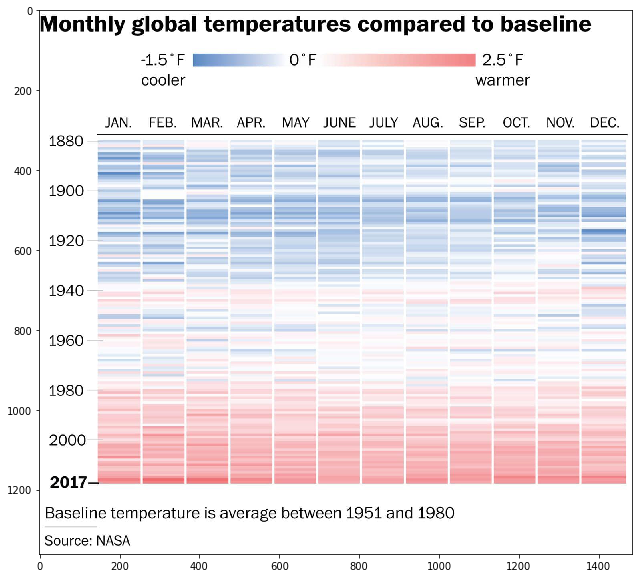

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(plt.imread('washpost.jpg'))